In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2021-01-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2021_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-01-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5175,사상구,14850,사상구,9675,186.96%,"10,013"
1,2021-01-07,간장,오복왕표 0.9ℓ 1병,11900,사상구,11900,사상구,0,0.0%,"11,900"
2,2021-01-07,갈치,60cm정도 500g 1마리(냉동),9310,사상구,10642,사상구,1332,14.31%,"9,976"
3,2021-01-07,고등어,30㎝정도 500g 1마리,4142,사상구,5625,사상구,1483,35.8%,"4,884"
4,2021-01-07,달걀,오경슈퍼란60g정도 10개,2980,사상구,3490,사상구,510,17.11%,"3,235"
5,2021-01-07,닭고기,육계 1.0㎏,9980,사상구,9990,사상구,10,0.1%,"9,985"
6,2021-01-07,대파,1.0㎏,3725,사상구,4290,사상구,565,15.17%,"4,008"
7,2021-01-07,돼지고기,삼겹살 500g,9900,사상구,10450,사상구,550,5.56%,"10,175"
8,2021-01-07,두부,500g 판두부(국산포장두부 420g) 1모,4415,사상구,4531,사상구,116,2.63%,"4,473"
9,2021-01-07,라면,신라면 120g 1봉지,676,사상구,3380,사상구,2704,400.0%,"2,028"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2021-04-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2021_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-04-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,사상구,9010,사상구,1585,21.35%,"8,218"
1,2021-04-08,간장,오복왕표 0.9ℓ 1병,5770,사상구,8417,사상구,2647,45.88%,"7,094"
2,2021-04-08,갈치,60cm정도 500g 1마리(냉동),9970,사상구,10640,사상구,670,6.72%,"10,305"
3,2021-04-08,고등어,30㎝정도 500g 1마리,5940,사상구,6523,사상구,583,9.81%,"6,232"
4,2021-04-08,달걀,오경슈퍼란60g정도 10개,3780,사상구,3990,사상구,210,5.56%,"3,885"
5,2021-04-08,닭고기,육계 1.0㎏,9980,사상구,9990,사상구,10,0.1%,"9,985"
6,2021-04-08,대파,1.0㎏,7475,사상구,8737,사상구,1262,16.88%,"8,106"
7,2021-04-08,돼지고기,삼겹살 500g,9900,사상구,11450,사상구,1550,15.66%,"10,675"
8,2021-04-08,두부,500g 판두부(국산포장두부 420g) 1모,3636,사상구,5194,사상구,1558,42.85%,"4,415"
9,2021-04-08,라면,신라면 120g 1봉지,676,사상구,676,사상구,0,0.0%,676


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2021-07-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2021_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-07-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5925,사상구,11925,사상구,6000,101.27%,"8,925"
1,2021-07-08,간장,오복왕표 0.9ℓ 1병,5770,사상구,8417,사상구,2647,45.88%,"7,094"
2,2021-07-08,갈치,60cm정도 500g 1마리(냉동),13245,사상구,14875,사상구,1630,12.31%,"14,060"
3,2021-07-08,고등어,30㎝정도 500g 1마리,5940,사상구,7160,사상구,1220,20.54%,"6,550"
4,2021-07-08,달걀,오경슈퍼란60g정도 10개,4300,사상구,4680,사상구,380,8.84%,"4,490"
5,2021-07-08,닭고기,육계 1.0㎏,8990,사상구,10800,사상구,1810,20.13%,"9,895"
6,2021-07-08,대파,1.0㎏,2250,사상구,2790,사상구,540,24.0%,"2,520"
7,2021-07-08,돼지고기,삼겹살 500g,12500,사상구,12500,사상구,0,0.0%,"12,500"
8,2021-07-08,두부,500g 판두부(국산포장두부 420g) 1모,5194,사상구,5194,사상구,0,0.0%,"5,194"
9,2021-07-08,라면,신라면 120g 1봉지,676,사상구,676,사상구,0,0.0%,676


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사상구"
region_code = "11"
target_date = "2021-10-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사상구2021_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-10-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5925,사상구,11925,사상구,6000,101.27%,"8,925"
1,2021-10-07,간장,오복왕표 0.9ℓ 1병,8417,사상구,9264,사상구,847,10.06%,"8,841"
2,2021-10-07,갈치,60cm정도 500g 1마리(냉동),8428,사상구,15800,사상구,7372,87.47%,"12,114"
3,2021-10-07,고등어,30㎝정도 500g 1마리,4987,사상구,5483,사상구,496,9.95%,"5,235"
4,2021-10-07,달걀,오경슈퍼란60g정도 10개,3980,사상구,4300,사상구,320,8.04%,"4,140"
5,2021-10-07,닭고기,육계 1.0㎏,10480,사상구,12990,사상구,2510,23.95%,"11,735"
6,2021-10-07,대파,1.0㎏,3100,사상구,3290,사상구,190,6.13%,"3,195"
7,2021-10-07,돼지고기,삼겹살 500g,9950,사상구,14900,사상구,4950,49.75%,"12,425"
8,2021-10-07,두부,500g 판두부(국산포장두부 420g) 1모,5194,사상구,5194,사상구,0,0.0%,"5,194"
9,2021-10-07,라면,신라면 120g 1봉지,736,사상구,736,사상구,0,0.0%,736


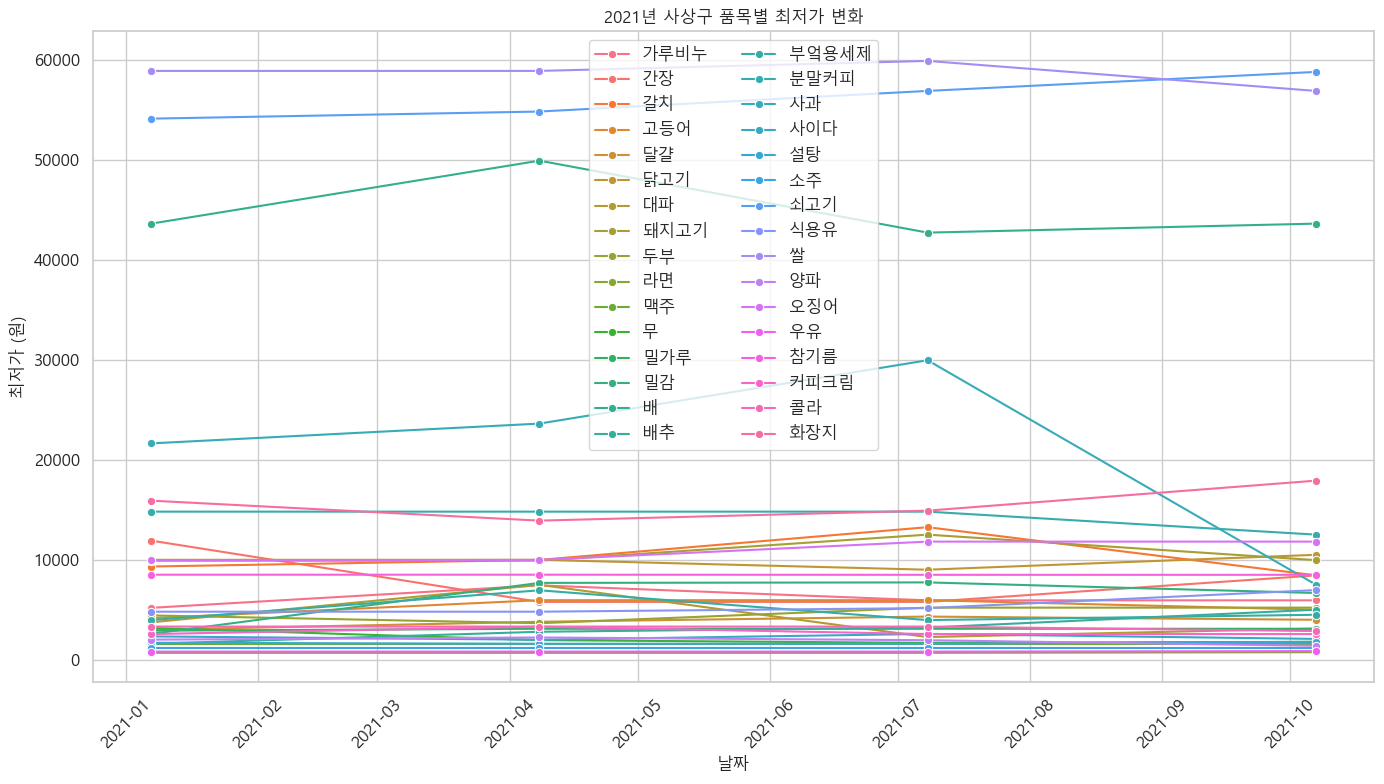

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2021_1q.csv")
q2 = pd.read_csv("사상구2021_2q.csv")
q3 = pd.read_csv("사상구2021_3q.csv")
q4 = pd.read_csv("사상구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 사상구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사상구2021_min.csv", index=False, encoding="utf-8-sig")

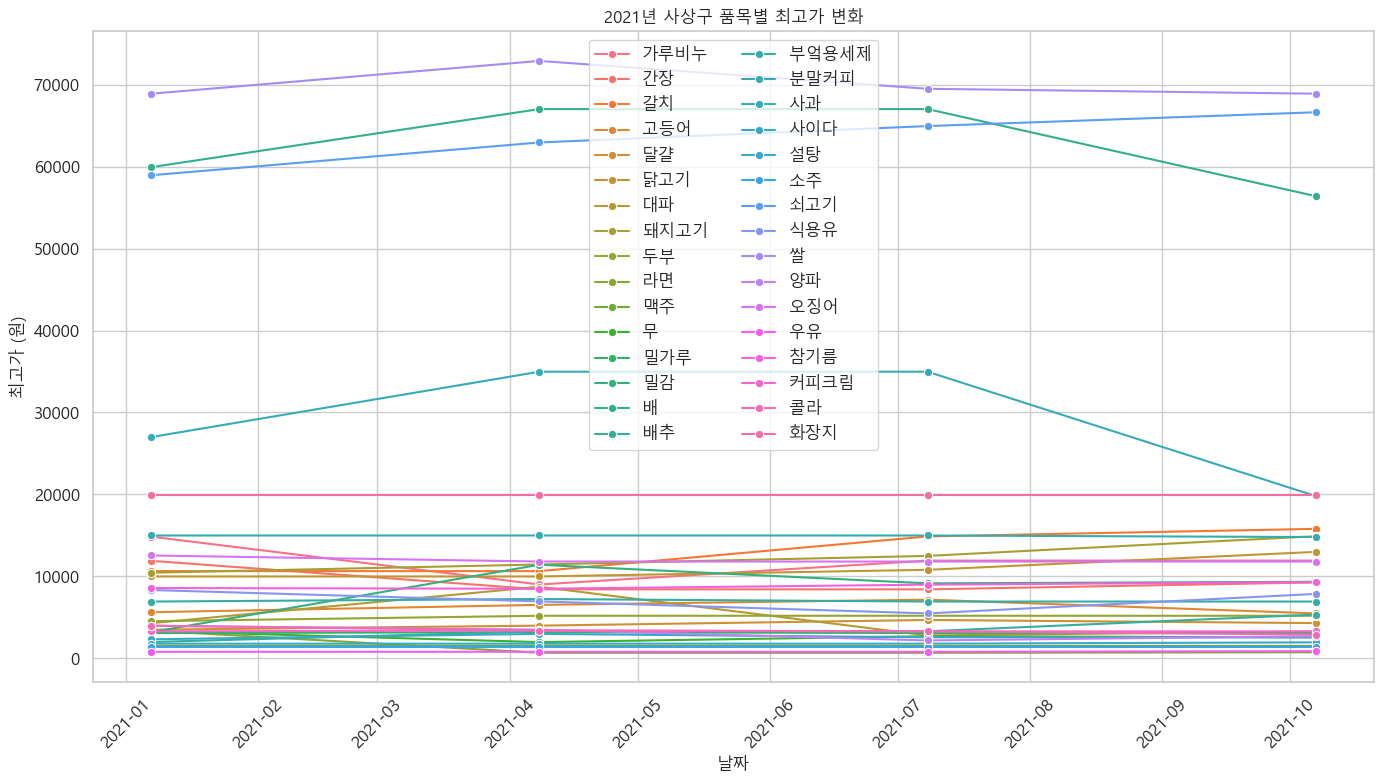

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사상구2021_1q.csv")
q2 = pd.read_csv("사상구2021_2q.csv")
q3 = pd.read_csv("사상구2021_3q.csv")
q4 = pd.read_csv("사상구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 사상구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사상구2021_max.csv", index=False, encoding="utf-8-sig")